In [1]:
import tensorflow as tf
print(tf.__version__)

2.4.0


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout

In [3]:
# Load in the data
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape:", x_train.shape)

4423680/4422102 [==============================] - 0s 0us/step
x_train.shape: (60000, 28, 28)


In [4]:
# the data is only 2D!
# Convolution expects height X width X color

x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print(x_train.shape)


(60000, 28, 28, 1)


In [5]:
# number of classes

K= len(set(y_train))
print("Number of classes: ", K)

Number of classes:  10


In [6]:
# build the model using the funcitonal API

i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3,3), strides=2, activation='relu')(i)
x = Conv2D(64, (3,3), strides=2, activation='relu')(x)
x = Conv2D(128, (3,3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [7]:
# Compile and fit
# Note: make sure you are using GPU for this!
model.compile(optimizer='adam', 
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1875/1875 [==============================] - 13s 3ms/step - loss: 0.7116 - accuracy: 0.7383 - val_loss: 0.4113 - val_accuracy: 0.8471
Epoch 2/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3726 - accuracy: 0.8606 - val_loss: 0.3396 - val_accuracy: 0.8758
Epoch 3/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3134 - accuracy: 0.8817 - val_loss: 0.3237 - val_accuracy: 0.8755
Epoch 4/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2774 - accuracy: 0.8950 - val_loss: 0.3051 - val_accuracy: 0.8875
Epoch 5/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2518 - accuracy: 0.9043 - val_loss: 0.3108 - val_accuracy: 0.8897
Epoch 6/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2234 - accuracy: 0.9159 - val_loss: 0.2924 - val_accuracy: 0.8927
Epoch 7/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2049 - accuracy: 0.9229 - val_loss: 0.2901 - val_accuracy

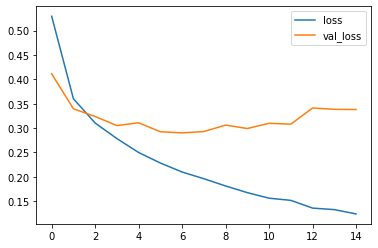

In [8]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

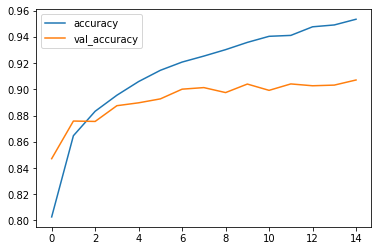

In [9]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

Confusion Matrix without normalization
[[876   0  22   9   1   0  84   0   8   0]
 [  2 973   3  15   2   1   3   0   1   0]
 [ 21   0 888   7  35   0  47   0   1   1]
 [ 21   7  24 895  25   0  25   0   3   0]
 [  2   1  67  13 842   0  71   0   4   0]
 [  1   0   0   0   0 982   0  12   0   5]
 [108   2  74  24  73   1 711   0   7   0]
 [  0   0   0   0   0  12   0 962   0  26]
 [  4   1   4   2   2   1   5   1 979   1]
 [  1   0   0   0   0   5   0  31   0 963]]


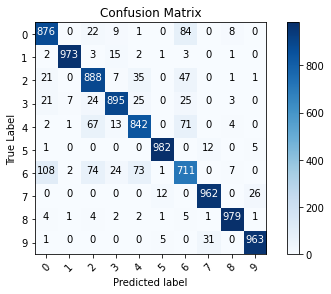

In [10]:
#Plot Confusion Matrix:

from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm ,classes,
                          normalize = False,
                          title = 'Confusion Matrix',
                          cmap=plt.cm.Blues):

  if normalize:
    cm =cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
    print("Normalize Confusion Matrix")
  else:
    print("Confusion Matrix without normalization")

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)


  fmt='.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i , j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i,j], fmt),
            horizontalalignment="center",
            color = "white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True Label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

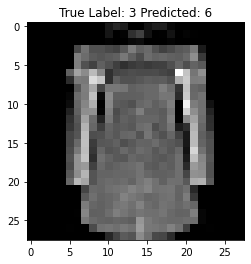

In [11]:
# Show some misclassified examples

misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28,28), cmap='gray')
plt.title("True Label: %s Predicted: %s" % (y_test[i], p_test[i]));

In [12]:
# Label Mapping

labels = '''T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle Boot'''.split()

In [13]:
labels

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle',
 'Boot']

# Saving the Model

In [17]:
model.save('CNN_fashion_MNIST.h5')

In [18]:
!ls -lh

total 8.4M
-rw-r--r-- 1 root root 4.2M Jan 24 19:01 CNN_fashion_MNIST.h5
-rw-r--r-- 1 root root 4.2M Jan 24 18:47 CNN_fasion_MNIST.h5
drwxr-xr-x 1 root root 4.0K Jan 20 17:27 sample_data


In [19]:
# Lets Load the model and confirm that it still works

model = tf.keras.models.load_model('CNN_fashion_MNIST.h5')
print(model.layers)


[<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7fd5c033c588>, <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fd5c033c8d0>, <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fd5c033ce10>, <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fd5c034d4a8>, <tensorflow.python.keras.layers.core.Flatten object at 0x7fd5c034da58>, <tensorflow.python.keras.layers.core.Dropout object at 0x7fd5c034dc50>, <tensorflow.python.keras.layers.core.Dense object at 0x7fd5c09edf98>, <tensorflow.python.keras.layers.core.Dropout object at 0x7fd5c034e080>, <tensorflow.python.keras.layers.core.Dense object at 0x7fd5c034e240>]
